In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#Data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

#Display the data table preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
#Checking the number of mice
mouse_count = combined_data["Mouse ID"].nunique()
print(f"Number of mice: {mouse_count}")

Number of mice: 249


In [12]:
#Number of unique mice before dropping  duplicates
initial_mouse_count = combined_data["Mouse ID"].nunique()
print(f"Initital number of mice: {initial_mouse_count}")

Initital number of mice: 249


In [18]:
combined_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
#Number of unique mice after dropping duplicates
final_mouse_count = combined_data["Mouse ID"].nunique()
print(f"Final number of mice: {final_mouse_count}")

Final number of mice: 248


In [25]:
np.array(['g989'], dtype=object)

array(['g989'], dtype=object)

In [26]:
#Remove mouse ID 'g989' from the data
clean_combined_data = combined_data[combined_data["Mouse ID"] != "g989"]
#Preview cleaned data
clean_combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
clean_mouse_count = clean_combined_data["Mouse ID"].nunique()
print(f"Number of mice in clean DataFrame: {clean_mouse_count}")

Number of mice in clean DataFrame: 248


In [40]:
#Group the clean dat by Drug Regimen
regimen_group = clean_combined_data.groupby('Drug Regimen')

#Calculate the summary statistics
tumor_volume_summary = pd.DataFrame({
    "Mean Tumor Volume": regimen_group["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": regimen_group["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": regimen_group["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": regimen_group["Tumor Volume (mm3)"].std(),
    "Tumor Volume SEM": regimen_group["Tumor Volume (mm3)"].sem()
})

#Display the summary statistics table
tumor_volume_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


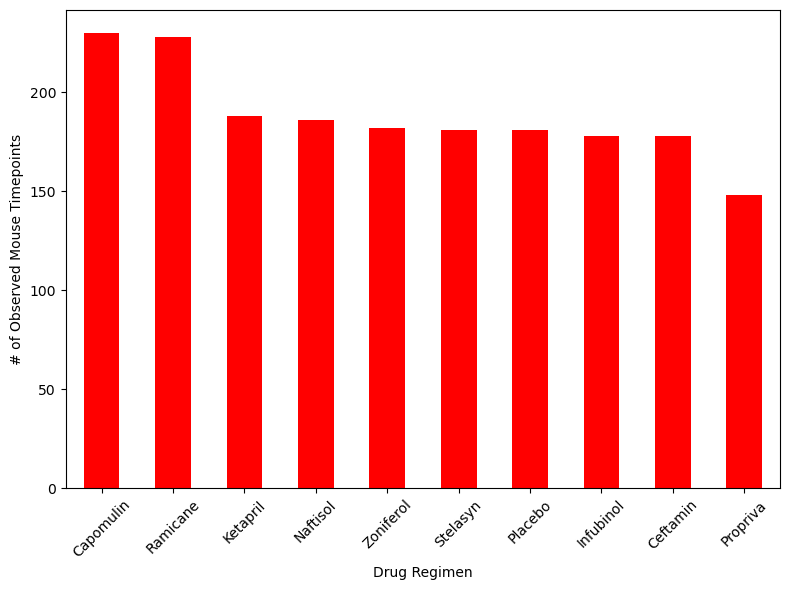

In [56]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
counts = clean_combined_data["Drug Regimen"].value_counts()
plt.figure(figsize=(8, 6))
counts.plot(kind="bar", color="red")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

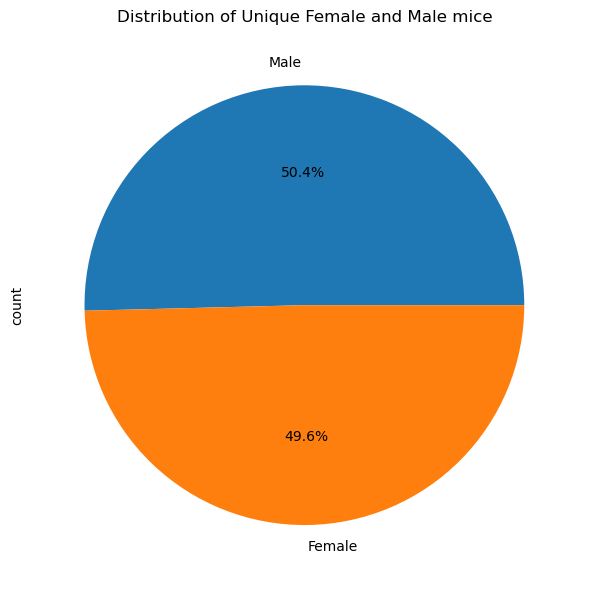

In [69]:
#Dropping duplicate mouse IDs to get unique mice
unique_mice = clean_combined_data.drop_duplicates(subset = ["Mouse ID","Sex"])

#Counts the number of unique females and male mice
gender_counts = unique_mice["Sex"].value_counts()

#Plotting the pie chart
plt.figure(figsize=(6, 6))
gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Unique Female and Male mice")
plt.ylabel('count')
plt.tight_layout()
plt.show()

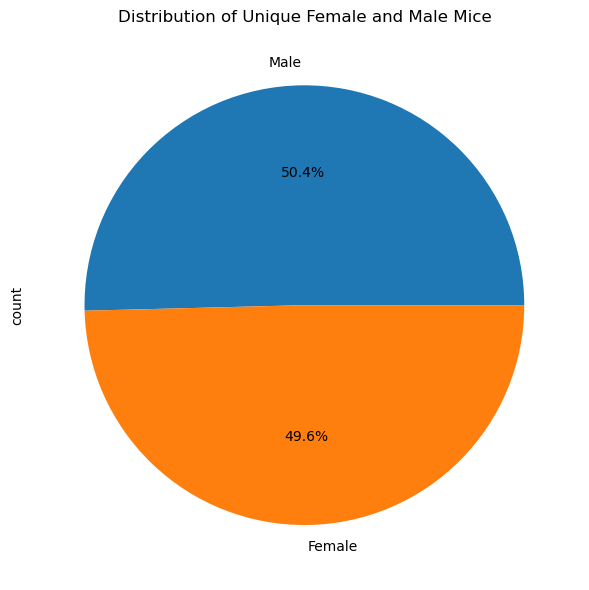

In [73]:
#Dropping duplicate mouse IDs to get unique mice
unique_mice = clean_combined_data.drop_duplicates(subset = ["Mouse ID","Sex"])

#Counts the number of unique females and male mice
gender_counts = unique_mice["Sex"].value_counts()

#Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Unique Female and Male Mice")
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
#start by getting the last(greatest )timepoint for each mouse
max_tumor = clean_combined_data.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

#Merge this group with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_combined_data, on=["Mouse ID", "Timepoint"], how="left")

In [114]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    
    final_tumor_vol = final_tumor_df.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    tumor_vol_list.append(final_tumor_vol)

#Quartiles and IQR
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1 

#Bound for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

#Identify outliers
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


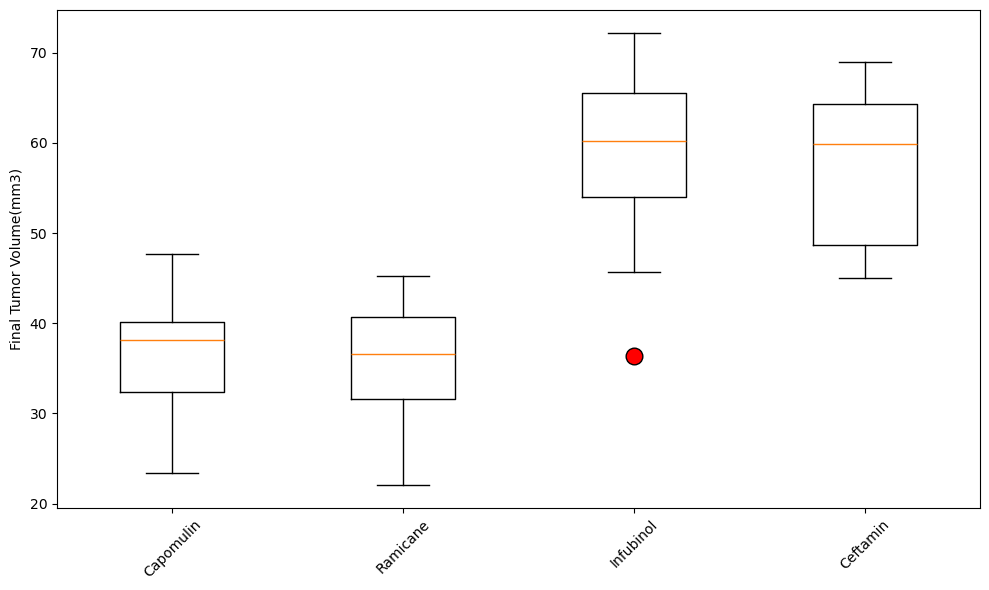

In [119]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    tumor_vol_list,
    tick_labels=treatment_list,
    flierprops=dict(marker='o', markerfacecolor='red', markersize=12)
)
plt.ylabel('Final Tumor Volume(mm3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


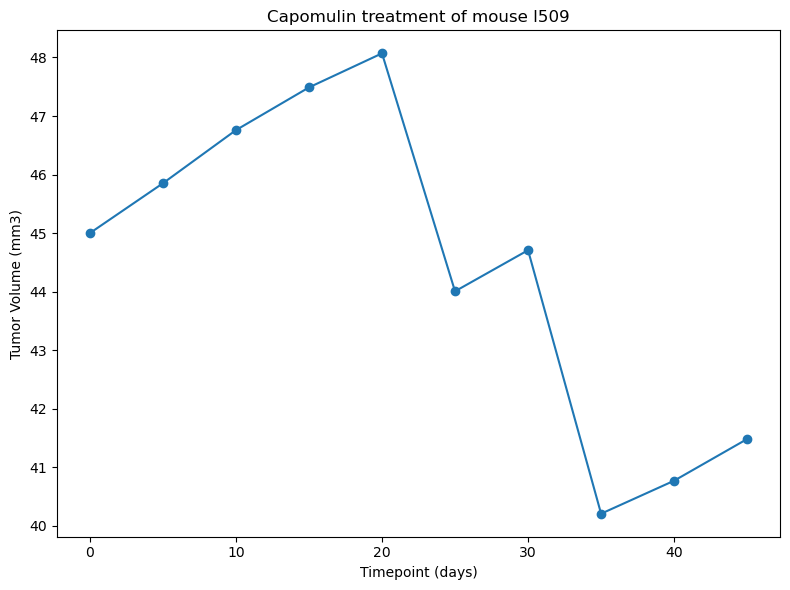

In [159]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_combined_data.loc[clean_combined_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']

plt.figure(figsize=(8, 6))
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'],marker='o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.tight_layout()
plt.show()